In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy import fftpack
import datetime
from sklearn import mixture

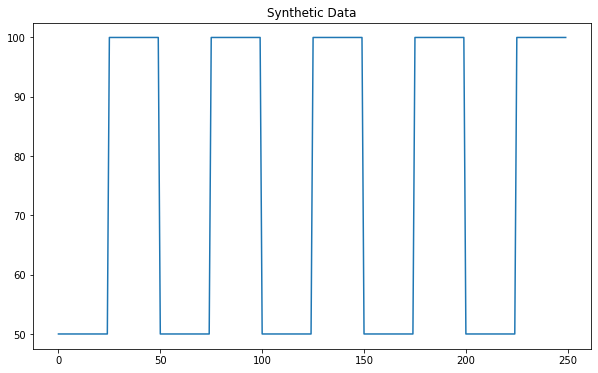

In [2]:
x = np.arange(0, 250)
y = np.empty([250], dtype = int)
count = 0
for i in range (0, 250, 25):
    count = count + 1
    if(count%2 == 1):
        y[i:i+25] = 50
    else:
        y[i:i+25] = 100
sd = y
plt.figure(figsize=(10,6))
plt.plot(x, y)
plt.title("Synthetic Data")
plt.show()

In [3]:
pd.DataFrame(sd).describe()

,0
count,250.000000
mean,75.000000
std,25.050151
min,50.000000
25%,50.000000
50%,75.000000
75%,100.000000
max,100.000000


In [4]:
seasonal_data = pd.DataFrame(zip(x,y),columns=['Time','Value'])
seasonal_data

,Time,Value
0,0,50
1,1,50
2,2,50
3,3,50
4,4,50
...,...,...
245,245,100
246,246,100
247,247,100
248,248,100


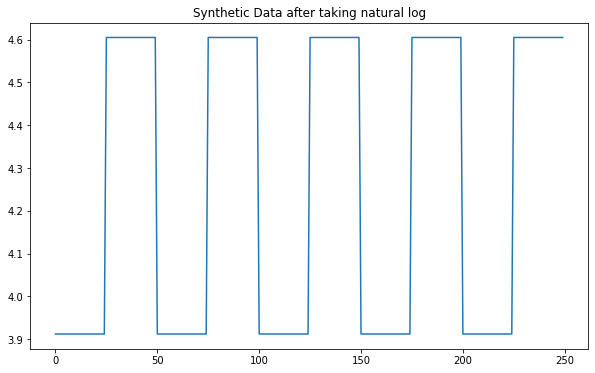

In [5]:
log_data = np.log(seasonal_data['Value'])
plt.figure(figsize=(10,6))
plt.plot(seasonal_data['Time'], log_data)
plt.title("Synthetic Data after taking natural log")
plt.show()

In [6]:
nlog_data = pd.DataFrame(zip(seasonal_data['Time'], log_data),columns=['Time','Log Value'])
nlog_data

,Time,Log Value
0,0,3.912023
1,1,3.912023
2,2,3.912023
3,3,3.912023
4,4,3.912023
...,...,...
245,245,4.605170
246,246,4.605170
247,247,4.605170
248,248,4.605170


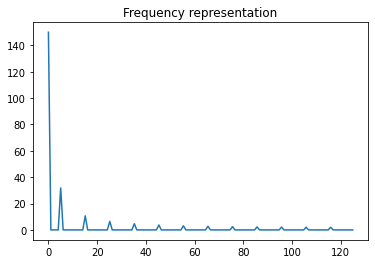

In [7]:
N = 250
sr = 1
y = np.array(seasonal_data['Value'])
f = fftpack.fftfreq(len(y))
yf = fftpack.fft(y)

T = 1.0 / N
x = np.linspace(0.0, N*T, N)
xf = np.linspace(0.0, 1.0/(2.0*T), int(N/2))
fig, ax = plt.subplots()
ax.plot(xf, 2.0/N * np.abs(yf[:N//2]))
plt.title("Frequency representation")
plt.show()

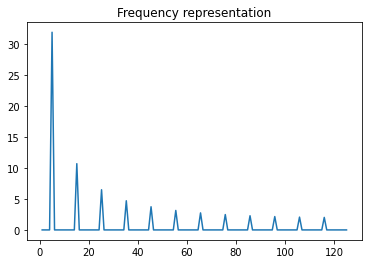

In [8]:
N = 250
sr = 1
y = np.array(seasonal_data['Value'])
f = fftpack.fftfreq(len(y))
yf = fftpack.fft(y)

T = 1.0 / N
x = np.linspace(0.0, N*T, N)
xf = np.linspace(0.0, 1.0/(2.0*T), int(N/2))
fig, ax = plt.subplots()
ax.plot(xf[1:], 2.0/N * np.abs(yf[1:N//2]))
plt.title("Frequency representation")
plt.show()

In [9]:
freq_ampli = pd.DataFrame(zip(np.abs(f[:N//2]),2.0/N * np.abs(yf[:N//2])),columns=['Freq','Ampli'])
freq_ampli

,Freq,Ampli
0,0.000,1.500000e+02
1,0.004,0.000000e+00
2,0.008,1.660084e-15
3,0.012,1.183588e-15
4,0.016,0.000000e+00
...,...,...
120,0.480,1.822539e-15
121,0.484,0.000000e+00
122,0.488,4.174774e-17
123,0.492,4.462373e-17


In [10]:
frame_size = 50
Fs = 1
dt = 1/Fs
freq_vector = np.fft.rfftfreq(frame_size, d=dt)
yf1 = yf[yf != 0]
yf1

array([ 1.87500000e+04-0.00000000e+00j,  2.10645684e-14-2.06438638e-13j,
       -9.60561235e-14-1.12525431e-13j, -2.50000000e+02+3.97363621e+03j,
        4.69359163e-14-4.27303077e-14j,  1.24575488e-15-5.19447169e-14j,
        5.68434189e-14+4.26325641e-14j,  7.82414695e-15-3.38196005e-14j,
       -1.88165714e-14-2.86614362e-14j, -2.50000000e+02+1.31054590e+03j,
        2.15150891e-14-1.51292656e-14j,  3.46650213e-15-2.29922207e-14j,
        2.70006240e-13+2.84217094e-14j,  6.60512993e-15-1.79269384e-14j,
       -8.60262025e-15-1.75714864e-14j, -2.50000000e+02+7.69420884e+02j,
        1.48049961e-14-7.84368209e-15j,  4.11319465e-15-1.45611113e-14j,
       -4.26325641e-14+1.42108547e-14j,  6.13722020e-15-1.18266697e-14j,
       -4.47965791e-15-1.30949186e-14j, -2.50000000e+02+5.31277043e+02j,
        1.16322917e-14-4.39887095e-15j,  4.42877468e-15-1.04468072e-14j,
        4.26325641e-14+0.00000000e+00j,  5.88362412e-15-8.52046752e-15j,
       -2.19537840e-15-1.06147280e-14j, -2.50000000

In [11]:
quefrency = np.fft.rfftfreq(np.log(yf1).size,freq_vector[1] - freq_vector[0])
cepstrum = np.fft.rfft(np.log(np.abs(yf1)))

In [12]:
quefrency[1:]

array([ 0.33333333,  0.66666667,  1.        ,  1.33333333,  1.66666667,
        2.        ,  2.33333333,  2.66666667,  3.        ,  3.33333333,
        3.66666667,  4.        ,  4.33333333,  4.66666667,  5.        ,
        5.33333333,  5.66666667,  6.        ,  6.33333333,  6.66666667,
        7.        ,  7.33333333,  7.66666667,  8.        ,  8.33333333,
        8.66666667,  9.        ,  9.33333333,  9.66666667, 10.        ,
       10.33333333, 10.66666667, 11.        , 11.33333333, 11.66666667,
       12.        , 12.33333333, 12.66666667, 13.        , 13.33333333,
       13.66666667, 14.        , 14.33333333, 14.66666667, 15.        ,
       15.33333333, 15.66666667, 16.        , 16.33333333, 16.66666667,
       17.        , 17.33333333, 17.66666667, 18.        , 18.33333333,
       18.66666667, 19.        , 19.33333333, 19.66666667, 20.        ,
       20.33333333, 20.66666667, 21.        , 21.33333333, 21.66666667,
       22.        , 22.33333333, 22.66666667, 23.        , 23.33

In [13]:
cepstrum[1:]

array([ 100.1300481 +9.94759830e-14j,   69.18633776+1.17239551e-13j,
         57.93230634+7.81597009e-14j,   56.60274408+2.13162821e-14j,
         50.8452087 +8.43769499e-14j,   45.55742817+2.75335310e-14j,
         39.753197  +3.46389584e-14j,   45.27881151+3.77475828e-14j,
         39.94519754-1.28785871e-14j,   53.07879451+7.54951657e-14j,
         43.3913875 -1.33226763e-14j,   44.49881316+3.41948692e-14j,
         44.01769302+3.57491814e-14j,   41.9292965 -3.10862447e-15j,
         50.57704343+7.43849426e-14j,   36.29691758-1.28785871e-14j,
         40.3124389 -3.99680289e-15j,   33.20175624+1.11022302e-16j,
         37.00029817+1.77635684e-15j,   39.59004269+2.67563749e-14j,
         41.41834961+1.27675648e-15j,   36.33492915+8.65973959e-15j,
         34.94010763-4.05231404e-15j,   28.24733174-3.41393580e-14j,
       -865.14441127-5.68434189e-14j,   28.00927376+2.66453526e-15j,
         34.46167205+6.15618667e-14j,   35.61140131+4.40480985e-14j,
         40.44246382+1.58206781e-1

In [14]:
cep = pd.DataFrame(zip(quefrency,cepstrum.real),columns=['Quefrency','Cepstrum'])
cep

,Quefrency,Cepstrum
0,0.000000,-3771.793151
1,0.333333,100.130048
2,0.666667,69.186338
3,1.000000,57.932306
4,1.333333,56.602744
...,...,...
71,23.666667,39.898101
72,24.000000,34.973704
73,24.333333,33.724410
74,24.666667,27.165425


In [15]:
# GMM on normal time series data
dfx = np.array(seasonal_data['Value']).reshape(-1,1)
lowest_bic = np.infty
bic = []
n_components_range = range(1, 7)
cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a Gaussian mixture with EM
        gmm = mixture.GaussianMixture(n_components=n_components,
                                      covariance_type=cv_type)
        gmm.fit(dfx)
        bic.append(gmm.bic(dfx))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm0 = gmm

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:972: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  return_n_iter=True)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:972: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  return_n_iter=True)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:972: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  return_n_iter=True)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:972: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  return_n_iter=True)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:972: ConvergenceWarning: Number o

In [16]:
# GMM on natural log values of time series data 
dfx = np.array(nlog_data['Log Value']).reshape(-1,1)
lowest_bic = np.infty
bic = []
n_components_range = range(1, 7)
cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a Gaussian mixture with EM
        gmm = mixture.GaussianMixture(n_components=n_components,
                                      covariance_type=cv_type)
        gmm.fit(dfx)
        bic.append(gmm.bic(dfx))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm1 = gmm

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:972: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  return_n_iter=True)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:972: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  return_n_iter=True)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:972: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  return_n_iter=True)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:972: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  return_n_iter=True)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:972: ConvergenceWarning: Number o

In [17]:
# GMM on fft data
dfx = freq_ampli.iloc[1:,1:]
lowest_bic = np.infty
bic = []
n_components_range = range(1, 7)
cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a Gaussian mixture with EM
        gmm = mixture.GaussianMixture(n_components=n_components,
                                      covariance_type=cv_type)
        gmm.fit(dfx)
        bic.append(gmm.bic(dfx))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm2 = gmm

In [18]:
# GMM on cepstrum data 
dfx = cep.iloc[1:,1:]
lowest_bic = np.infty
bic = []
n_components_range = range(1, 7)
cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a Gaussian mixture with EM
        gmm = mixture.GaussianMixture(n_components=n_components,
                                      covariance_type=cv_type)
        gmm.fit(dfx)
        bic.append(gmm.bic(dfx))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm3 = gmm

Results of GMM on normal time series data

In [19]:
seasonal_data.describe()

,Time,Value
count,250.000000,250.000000
mean,124.500000,75.000000
std,72.312977,25.050151
min,0.000000,50.000000
25%,62.250000,50.000000
50%,124.500000,75.000000
75%,186.750000,100.000000
max,249.000000,100.000000


In [20]:
best_gmm0

GaussianMixture(covariance_type='tied', init_params='kmeans', max_iter=100,
                means_init=None, n_components=2, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [21]:
best_gmm0.weights_

array([0.5, 0.5])

In [22]:
best_gmm0.means_

array([[100.],
       [ 50.]])

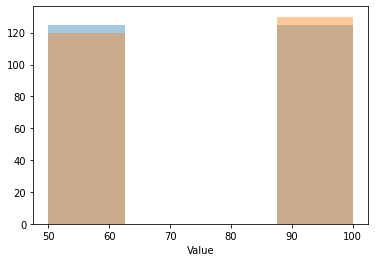

In [23]:
#Time Series
sns.distplot(seasonal_data['Value'],kde=False)
z,_ = best_gmm0.sample(250)
sns.distplot(z,kde=False)

In [24]:
#Time Series
print(best_gmm0.score(np.array(seasonal_data['Value']).reshape(-1,1)))
#print(best_gmm0.score(z))

5.29566956521752


Results of GMM on natural log values of time series data

In [25]:
nlog_data.describe()

,Time,Log Value
count,250.000000,250.000000
mean,124.500000,4.258597
std,72.312977,0.347269
min,0.000000,3.912023
25%,62.250000,3.912023
50%,124.500000,4.258597
75%,186.750000,4.605170
max,249.000000,4.605170


In [26]:
best_gmm1

GaussianMixture(covariance_type='tied', init_params='kmeans', max_iter=100,
                means_init=None, n_components=2, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [27]:
best_gmm1.weights_

array([0.5, 0.5])

In [28]:
best_gmm1.means_

array([[4.60517019],
       [3.91202301]])

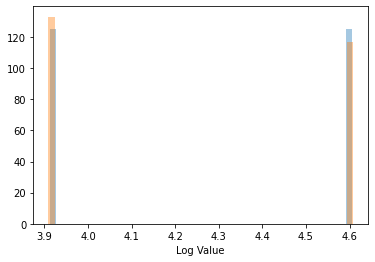

In [29]:
#Time Series - Log
sns.distplot(nlog_data['Log Value'],bins=50,kde = False)
z,_ = best_gmm1.sample(250)
sns.distplot(z,bins=50,kde=False)

In [30]:
#Time Series - Log
print(best_gmm1.score(np.array(nlog_data['Log Value']).reshape(-1,1)))
#print(best_gmm1.score(z))

5.295669527018744


Results of GMM on fft data

In [31]:
freq_ampli.describe()

,Freq,Ampli
count,125.000000,1.250000e+02
mean,0.248000,1.794359e+00
std,0.144914,1.372117e+01
min,0.000000,0.000000e+00
25%,0.124000,0.000000e+00
50%,0.248000,4.667280e-17
75%,0.372000,2.104158e-16
max,0.496000,1.500000e+02


In [32]:
best_gmm2

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=4, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [33]:
best_gmm2.weights_

array([0.08064909, 0.00806452, 0.90322188, 0.00806452])

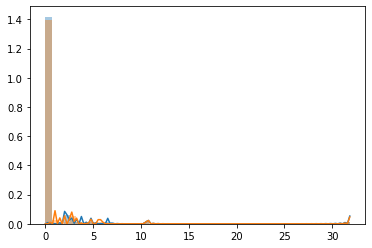

In [42]:
#Frequency
freq1 = freq_ampli.iloc[1:,1:]
y,_ = best_gmm2.sample(125)
sns.distplot(freq1)
sns.distplot(y)

In [35]:
#Freq
print(best_gmm2.score(freq1))
#print(best_gmm2.score(y))

4.993674144651401


Results of GMM on cepstrum data

In [36]:
cep.describe()

,Quefrency,Cepstrum
count,76.000000,76.000000
mean,12.500000,-20.769917
std,7.361059,474.925232
min,0.000000,-3771.793151
25%,6.250000,33.912346
50%,12.500000,38.052042
75%,18.750000,40.686435
max,25.000000,1054.230015


In [37]:
best_gmm3

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=4, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [38]:
best_gmm3.weights_

array([0.83465283, 0.02666667, 0.01333333, 0.12534717])

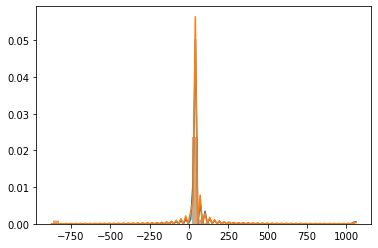

In [39]:
cep1 = cep.iloc[1:,1:]
z,_ = best_gmm3.sample(125)
sns.distplot(cep1)
sns.distplot(z)

In [40]:
print(best_gmm3.score(cep1))
#print(best_gmm3.score(z))

-3.446299220350187
